In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [4]:
import pandas as pd
data=pd.read_csv("./refined_taxi7.csv")
data


,START_X,START_Y,ARRIVE_X,ARRIVE_Y
0,START_X,START_,ARRIVE_X,ARRIVE_
1,35.94256,128.562863,35.855793,128.547588
2,35.825766,128.62521,35.829548,128.734976
3,35.817025,128.52248,35.853608,128.480621
4,35.808406,128.54516,35.803238,128.493755
...,...,...,...,...
74586,35.853483,128.54577,35.852353,128.523096
74587,35.873758,128.59471,35.867356,128.548384
74588,35.87591,128.554968,35.900045,128.548538
74589,35.837443,128.53372,35.860581,128.505026


In [5]:
data.columns

Index(['START_X', 'START_Y', 'ARRIVE_X', 'ARRIVE_Y'], dtype='object')

In [6]:
data

,START_X,START_Y,ARRIVE_X,ARRIVE_Y
0,START_X,START_,ARRIVE_X,ARRIVE_
1,35.94256,128.562863,35.855793,128.547588
2,35.825766,128.62521,35.829548,128.734976
3,35.817025,128.52248,35.853608,128.480621
4,35.808406,128.54516,35.803238,128.493755
...,...,...,...,...
74586,35.853483,128.54577,35.852353,128.523096
74587,35.873758,128.59471,35.867356,128.548384
74588,35.87591,128.554968,35.900045,128.548538
74589,35.837443,128.53372,35.860581,128.505026


In [7]:
data=data.drop(0)

In [8]:
data

,START_X,START_Y,ARRIVE_X,ARRIVE_Y
1,35.94256,128.562863,35.855793,128.547588
2,35.825766,128.62521,35.829548,128.734976
3,35.817025,128.52248,35.853608,128.480621
4,35.808406,128.54516,35.803238,128.493755
5,35.844656,128.54456,35.830705,128.546111
...,...,...,...,...
74586,35.853483,128.54577,35.852353,128.523096
74587,35.873758,128.59471,35.867356,128.548384
74588,35.87591,128.554968,35.900045,128.548538
74589,35.837443,128.53372,35.860581,128.505026


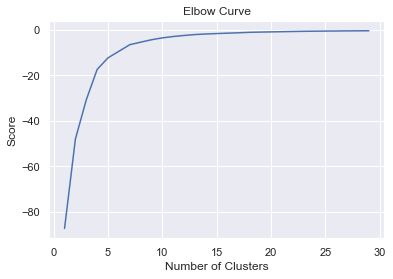

In [9]:
K_clusters = range(1,30)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['START_X']]
X_axis = data[['START_Y']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [10]:
data[data.columns[0:2]]

,START_X,START_Y
1,35.94256,128.562863
2,35.825766,128.62521
3,35.817025,128.52248
4,35.808406,128.54516
5,35.844656,128.54456
...,...,...
74586,35.853483,128.54577
74587,35.873758,128.59471
74588,35.87591,128.554968
74589,35.837443,128.53372


In [11]:
kmeans = KMeans(n_clusters = 7, init ='random')
kmeans.fit(data[data.columns[0:2]]) # Compute k-means clustering.
data['cluster_label'] = kmeans.fit_predict(data[data.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(data[data.columns[0:2]]) # Labels of each point
data.head(10)

,START_X,START_Y,ARRIVE_X,ARRIVE_Y,cluster_label
1,35.94256,128.562863,35.855793,128.547588,5
2,35.825766,128.62521,35.829548,128.734976,6
3,35.817025,128.52248,35.853608,128.480621,1
4,35.808406,128.54516,35.803238,128.493755,1
5,35.844656,128.54456,35.830705,128.546111,1
6,35.941906,128.57018,35.926963,128.559258,5
7,35.827008,128.718,35.836973,128.716281,4
8,35.859141,128.49961,35.840221,128.566123,1
9,35.80791,128.520131,35.8529,128.480556,1
10,35.807748,128.51961,35.823531,128.64131,1


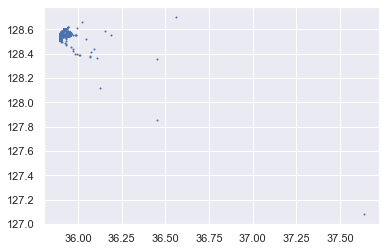

In [16]:
data1=data[data['cluster_label']==5]
data1_X=data1.loc[:,'START_X'].to_numpy()
data1_Y=data1.loc[:,'START_Y'].to_numpy()
data1_X=data1_X.astype(float)
data1_Y=data1_Y.astype(float)
plt.scatter(data1_X[:],data1_Y[:], s=1)
plt.show()

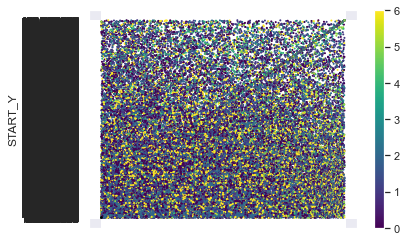

In [17]:
data.plot.scatter(x = 'START_X', y = 'START_Y', c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=1, alpha=0.5)
plt.show()